In [2]:
import pandas as pd
import numpy as np
import turtle as tp
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [13]:
df = pd.read_csv(r"C:\Users\BHUVANESWARI\OneDrive\Desktop\guviproject\Industrial Human Resource Geo-Visualization\data\merged_workers.csv")
df.head(5)

,state_code,district_code,indiastates,division,group,class,nic_name,main_workers__total___persons,main_workers__total__males,main_workers__total__females,...,marginal_workers__total___persons,marginal_workers__total__males,marginal_workers__total__females,marginal_workers__rural___persons,marginal_workers__rural__males,marginal_workers__rural__females,marginal_workers__urban___persons,marginal_workers__urban__males,marginal_workers__urban__females,source_file
0,`07,`000,STATE - NCT OF DELHI,`00,`000,`0000,Total,828980,708129,120851,...,61009,44743,16266,1969,1494,475,59040,43249,15791,DDW_B18sc_0700_NIC_FINAL_STATE_NCT_OF_DELHI-20...
1,`07,`000,STATE - NCT OF DELHI,`01,`000,`0000,"Crop and animal production, hunting and relate...",1484,1271,213,...,224,150,74,23,13,10,201,137,64,DDW_B18sc_0700_NIC_FINAL_STATE_NCT_OF_DELHI-20...
2,`07,`000,STATE - NCT OF DELHI,`01,`011,`0000,Growing of non-perennial crops,169,151,18,...,92,65,27,14,12,2,78,53,25,DDW_B18sc_0700_NIC_FINAL_STATE_NCT_OF_DELHI-20...
3,`07,`000,STATE - NCT OF DELHI,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",83,81,2,...,37,27,10,8,6,2,29,21,8,DDW_B18sc_0700_NIC_FINAL_STATE_NCT_OF_DELHI-20...
4,`07,`000,STATE - NCT OF DELHI,`01,`011,`0112,Growing of rice,9,9,0,...,0,0,0,0,0,0,0,0,0,DDW_B18sc_0700_NIC_FINAL_STATE_NCT_OF_DELHI-20...


In [14]:
df.isnull().sum()

state_code                           0
district_code                        0
indiastates                          0
division                             0
group                                0
class                                0
nic_name                             0
main_workers__total___persons        0
main_workers__total__males           0
main_workers__total__females         0
main_workers__rural___persons        0
main_workers__rural__males           0
main_workers__rural__females         0
main_workers__urban___persons        0
main_workers__urban__males           0
main_workers__urban__females         0
marginal_workers__total___persons    0
marginal_workers__total__males       0
marginal_workers__total__females     0
marginal_workers__rural___persons    0
marginal_workers__rural__males       0
marginal_workers__rural__females     0
marginal_workers__urban___persons    0
marginal_workers__urban__males       0
marginal_workers__urban__females     0
source_file              

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195145 entries, 0 to 195144
Data columns (total 26 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   state_code                         195145 non-null  object
 1   district_code                      195145 non-null  object
 2   indiastates                        195145 non-null  object
 3   division                           195145 non-null  object
 4   group                              195145 non-null  object
 5   class                              195145 non-null  object
 6   nic_name                           195145 non-null  object
 7   main_workers__total___persons      195145 non-null  int64 
 8   main_workers__total__males         195145 non-null  int64 
 9   main_workers__total__females       195145 non-null  int64 
 10  main_workers__rural___persons      195145 non-null  int64 
 11  main_workers__rural__males         195145 non-null  

In [16]:
df.describe()

,main_workers__total___persons,main_workers__total__males,main_workers__total__females,main_workers__rural___persons,main_workers__rural__males,main_workers__rural__females,main_workers__urban___persons,main_workers__urban__males,main_workers__urban__females,marginal_workers__total___persons,marginal_workers__total__males,marginal_workers__total__females,marginal_workers__rural___persons,marginal_workers__rural__males,marginal_workers__rural__females,marginal_workers__urban___persons,marginal_workers__urban__males,marginal_workers__urban__females
count,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,195145.000000,195145.000000
mean,1.492138e+03,1.193171e+03,2.989664e+02,6.606187e+02,5.170353e+02,1.435834e+02,8.315188e+02,6.761358e+02,1.553830e+02,3.642672e+02,1.826322e+02,1.816350e+02,2.502286e+02,1.165241e+02,1.337045e+02,1.140386e+02,66.108094,47.930472
std,4.568169e+04,3.773917e+04,8.582019e+03,2.044436e+04,1.654295e+04,4.314446e+03,2.586781e+04,2.167339e+04,4.531593e+03,1.176940e+04,5.760575e+03,6.309699e+03,8.232274e+03,3.723078e+03,4.748460e+03,3.842889e+03,2132.581727,1803.271234
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,6.000000e+00,6.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,2.800000e+01,2.300000e+01,3.000000e+00,1.200000e+01,8.000000e+00,0.000000e+00,1.200000e+01,9.000000e+00,0.000000e+00,4.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
75%,1.880000e+02,1.450000e+02,2.400000e+01,7.400000e+01,5.600000e+01,8.000000e+00,8.600000e+01,6.700000e+01,1.200000e+01,2.800000e+01,1.800000e+01,6.000000e+00,1.400000e+01,8.000000e+00,3.000000e+00,9.000000e+00,6.000000,2.000000
max,1.561976e+07,1.280140e+07,2.818356e+06,6.770444e+06,5.446541e+06,1.323903e+06,8.849315e+06,7.354862e+06,1.494453e+06,3.834122e+06,1.966750e+06,1.867372e+06,2.515182e+06,1.223824e+06,1.291358e+06,1.318940e+06,742926.000000,576014.000000


In [17]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
195140    False
195141    False
195142    False
195143    False
195144    False
Length: 195145, dtype: bool

In [18]:
#Check Duplicate Rows
duplicates = df.duplicated().sum()
print("Duplicate Rows:", duplicates)


Duplicate Rows: 0


In [19]:

df.sample(10)


,state_code,district_code,indiastates,division,group,class,nic_name,main_workers__total___persons,main_workers__total__males,main_workers__total__females,...,marginal_workers__total___persons,marginal_workers__total__males,marginal_workers__total__females,marginal_workers__rural___persons,marginal_workers__rural__males,marginal_workers__rural__females,marginal_workers__urban___persons,marginal_workers__urban__males,marginal_workers__urban__females,source_file
79920,`33,`616,District - Ariyalur,`65,`651,`0000,Insurance,26,26,0,...,12,12,0,6,6,0,6,6,0,DDW_B18sc_3300_NIC_FINAL_STATE_TAMIL_NADU-2011...
147282,`08,`102,District - Churu,`45,`453,`0000,Sale of motor vehicle parts and accessories,276,276,0,...,26,26,0,6,6,0,20,20,0,DDW_B18_0800_NIC_FINAL_STATE_RAJASTHAN-2011.csv
55567,`29,`572,District - Bangalore,`13,`000,`0000,Manufacture of textiles,3118,2208,910,...,521,343,178,144,84,60,377,259,118,DDW_B18sc_2900_NIC_FINAL_STATE_KARNATAKA-2011.csv
5240,`07,`097,District - South West,`73,`731,`7310,Advertising,9,6,3,...,6,0,6,0,0,0,6,0,6,DDW_B18sc_0700_NIC_FINAL_STATE_NCT_OF_DELHI-20...
79858,`33,`616,District - Ariyalur,`47,`476,`0000,Retail sale of cultural and recreation goods i...,12,12,0,...,12,12,0,12,12,0,0,0,0,DDW_B18sc_3300_NIC_FINAL_STATE_TAMIL_NADU-2011...
136593,`21,`377,District - Baleshwar,`32,`329,`0000,Other manufacturing n.e.c.,180,144,36,...,64,46,18,34,28,6,30,18,12,DDW_B18st_2100_NIC_FINAL_STATE_ODISHA-2011.csv
16670,`20,`367,District - Simdega,`41,`000,`0000,Construction of buildings,252,212,40,...,131,77,54,117,72,45,14,5,9,DDW_B18sc_2000_NIC_FINAL_STATE_JHARKHAND-2011.csv
58786,`29,`578,District - Chamarajanagar,`47,`471,`0000,Retail sale in non-specialized stores,134,102,32,...,38,18,20,36,18,18,2,0,2,DDW_B18sc_2900_NIC_FINAL_STATE_KARNATAKA-2011.csv
182850,`19,`328,District - Jalpaiguri,`13,`131,`1311,Preparation and spinning of textile fibres,1952,1731,221,...,1410,860,550,1095,702,393,315,158,157,DDW_B18_1900_NIC_FINAL_STATE_WEST_BENGAL-2011.csv
142446,`21,`395,District - Kalahandi,`47,`000,`0000,"Retail trade, except of motor vehicles and mot...",1086,894,192,...,358,172,186,346,160,186,12,12,0,DDW_B18st_2100_NIC_FINAL_STATE_ODISHA-2011.csv


In [20]:
# sample entries
# Class Distribution Example
df.columns.tolist()




['state_code',
 'district_code',
 'indiastates',
 'division',
 'group',
 'class',
 'nic_name',
 'main_workers__total___persons',
 'main_workers__total__males',
 'main_workers__total__females',
 'main_workers__rural___persons',
 'main_workers__rural__males',
 'main_workers__rural__females',
 'main_workers__urban___persons',
 'main_workers__urban__males',
 'main_workers__urban__females',
 'marginal_workers__total___persons',
 'marginal_workers__total__males',
 'marginal_workers__total__females',
 'marginal_workers__rural___persons',
 'marginal_workers__rural__males',
 'marginal_workers__rural__females',
 'marginal_workers__urban___persons',
 'marginal_workers__urban__males',
 'marginal_workers__urban__females',
 'source_file']

In [21]:
#Class Distribution

counts = df['nic_name'].value_counts()
percentages = df['nic_name'].value_counts(normalize=True) * 100

print("\n🔹 Class Counts:")
display(counts)

print("\n🔹 Class Percentages:")
display(percentages)



🔹 Class Counts:


nic_name
Construction of buildings                                      1446
Activities of households as employers of domestic personnel    1308
Manufacture of furniture                                       1239
Water collection, treatment and supply                         1194
Veterinary activities                                          1119
                                                               ... 
Renting and leasing of recreational and sports goods             21
Growing of grapes                                                17
Growing of tobacco                                               16
Building of pleasure and sporting boats                          14
Mining of uranium and thorium ores                                4
Name: count, Length: 587, dtype: int64


🔹 Class Percentages:


nic_name
Construction of buildings                                      0.740987
Activities of households as employers of domestic personnel    0.670271
Manufacture of furniture                                       0.634913
Water collection, treatment and supply                         0.611853
Veterinary activities                                          0.573420
                                                                 ...   
Renting and leasing of recreational and sports goods           0.010761
Growing of grapes                                              0.008711
Growing of tobacco                                             0.008199
Building of pleasure and sporting boats                        0.007174
Mining of uranium and thorium ores                             0.002050
Name: proportion, Length: 587, dtype: float64

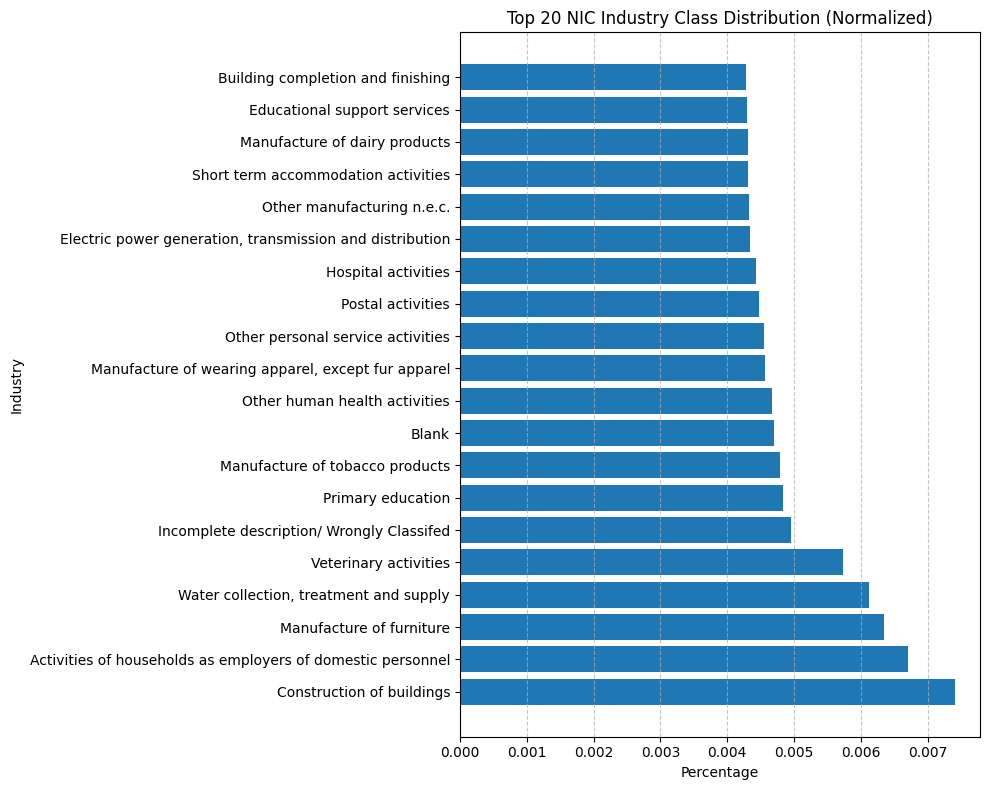

In [22]:
import matplotlib.pyplot as plt

N = 20 
counts = df['nic_name'].value_counts(normalize=True).head(N)

plt.figure(figsize=(10, 8))
plt.barh(counts.index, counts.values)
plt.title(f"Top {N} NIC Industry Class Distribution (Normalized)")
plt.xlabel("Percentage")
plt.ylabel("Industry")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [23]:
#Dataset Size, Imbalance & Noise Check
print("Dataset Shape:", df.shape)
print("\nNIC Class Count:")
print(df['nic_name'].value_counts())

print("\nNIC Class Percentage:")
print(df['nic_name'].value_counts(normalize=True) * 100)


Dataset Shape: (195145, 26)

NIC Class Count:
nic_name
Construction of buildings                                      1446
Activities of households as employers of domestic personnel    1308
Manufacture of furniture                                       1239
Water collection, treatment and supply                         1194
Veterinary activities                                          1119
                                                               ... 
Renting and leasing of recreational and sports goods             21
Growing of grapes                                                17
Growing of tobacco                                               16
Building of pleasure and sporting boats                          14
Mining of uranium and thorium ores                                4
Name: count, Length: 587, dtype: int64

NIC Class Percentage:
nic_name
Construction of buildings                                      0.740987
Activities of households as employers of domestic pers

In [24]:
#Noise Check
print("\n🔹 Unique values in categorical columns:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()} unique values")



🔹 Unique values in categorical columns:
state_code: 23 unique values
district_code: 472 unique values
indiastates: 491 unique values
division: 89 unique values
group: 241 unique values
class: 423 unique values
nic_name: 587 unique values
source_file: 23 unique values


In [25]:
#Data Preprocessing
#Remove duplicate entries
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)


Number of duplicate rows: 0
Shape after removing duplicates: (195145, 26)


In [26]:
# Handle missing values

from sklearn.impute import KNNImputer  
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("\nNumeric columns for imputation:\n", numeric_cols)

# Detect missing values before imputation
missing_counts = df[numeric_cols].isnull().sum()
print("\nMissing values before imputation:\n", missing_counts)

# Apply KNN Imputer
imputer = KNNImputer(n_neighbors=3)
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Check missing values after imputation
print("\nMissing values after imputation:\n", df[numeric_cols].isnull().sum())



Numeric columns for imputation:
 Index(['main_workers__total___persons', 'main_workers__total__males',
       'main_workers__total__females', 'main_workers__rural___persons',
       'main_workers__rural__males', 'main_workers__rural__females',
       'main_workers__urban___persons', 'main_workers__urban__males',
       'main_workers__urban__females', 'marginal_workers__total___persons',
       'marginal_workers__total__males', 'marginal_workers__total__females',
       'marginal_workers__rural___persons', 'marginal_workers__rural__males',
       'marginal_workers__rural__females', 'marginal_workers__urban___persons',
       'marginal_workers__urban__males', 'marginal_workers__urban__females'],
      dtype='object')

Missing values before imputation:
 main_workers__total___persons        0
main_workers__total__males           0
main_workers__total__females         0
main_workers__rural___persons        0
main_workers__rural__males           0
main_workers__rural__females         0
main

In [27]:
#Detect & handle outliers
outlier_summary = {}
outlier_indices = set()

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    mask = (df[col] < lower) | (df[col] > upper)
    outlier_summary[col] = int(mask.sum())
    outlier_indices.update(df[mask].index)

print("\nOutlier counts per numeric column:\n", outlier_summary)
print("Total rows with any outlier:", len(outlier_indices))

# Handle outliers using capping
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)

print("Shape after outlier handling:", df.shape)


Outlier counts per numeric column:
 {'main_workers__total___persons': 31382, 'main_workers__total__males': 31318, 'main_workers__total__females': 32496, 'main_workers__rural___persons': 31511, 'main_workers__rural__males': 31374, 'main_workers__rural__females': 33798, 'main_workers__urban___persons': 32147, 'main_workers__urban__males': 32011, 'main_workers__urban__females': 31119, 'marginal_workers__total___persons': 31358, 'marginal_workers__total__males': 30908, 'marginal_workers__total__females': 34515, 'marginal_workers__rural___persons': 32646, 'marginal_workers__rural__males': 33051, 'marginal_workers__rural__females': 35709, 'marginal_workers__urban___persons': 32270, 'marginal_workers__urban__males': 31346, 'marginal_workers__urban__females': 34682}
Total rows with any outlier: 66988
Shape after outlier handling: (195145, 26)


In [28]:
# Normalize / Standardize numeric features
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("\nNumeric columns after standardization (first 5 rows):")
display(df[numeric_cols].head())



Numeric columns after standardization (first 5 rows):


,main_workers__total___persons,main_workers__total__males,main_workers__total__females,main_workers__rural___persons,main_workers__rural__males,main_workers__rural__females,main_workers__urban___persons,main_workers__urban__males,main_workers__urban__females,marginal_workers__total___persons,marginal_workers__total__males,marginal_workers__total__females,marginal_workers__rural___persons,marginal_workers__rural__males,marginal_workers__rural__females,marginal_workers__urban___persons,marginal_workers__urban__males,marginal_workers__urban__females
0,1.966347,1.966154,1.947023,1.966727,1.964182,1.892711,1.952597,1.952206,1.983026,1.968513,1.974747,1.885550,1.944463,1.887408,1.885532,1.940818,1.943134,1.930855
1,1.966347,1.966154,1.947023,1.922427,1.760214,1.892711,1.952597,1.952206,1.983026,1.968513,1.974747,1.885550,1.041781,0.983269,1.885532,1.940818,1.943134,1.930855
2,0.257213,0.418254,0.093762,-0.469784,-0.434869,-0.420240,1.197412,1.469897,0.745967,1.968513,1.974747,1.885550,0.364770,0.854107,0.051341,1.940818,1.943134,1.930855
3,-0.246163,-0.116823,-0.612242,-0.587917,-0.590273,-0.420240,0.215670,0.473125,-0.667813,0.704996,0.901301,1.034060,-0.086571,0.079130,0.051341,1.940818,1.943134,1.930855
4,-0.679300,-0.667187,-0.700492,-0.720818,-0.726252,-0.677234,-0.602447,-0.571878,-0.667813,-0.711675,-0.708869,-0.668919,-0.688358,-0.695846,-0.615638,-0.678522,-0.661147,-0.589332


In [32]:
df.to_csv(r"C:\Users\BHUVANESWARI\OneDrive\Desktop\guviproject\Industrial Human Resource Geo-Visualization\data\merged_workers_preprocessed.csv", index=False)
print("\n✅ Preprocessed dataset saved successfully!")


✅ Preprocessed dataset saved successfully!


In [33]:
#Feature Engineering and Dimensionality Reduction

In [34]:
#target variable
target = "main_workers__total___persons"
y = df[target]

In [35]:
#Encode categorical features
X = df.drop(columns=[target, 'source_file']) 

X_encoded = X.copy()
categorical_cols = X_encoded.select_dtypes(include=['object']).columns
le_dict = {}

for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    le_dict[col] = le  # save encoder for future inverse transform

print("\nEncoded categorical columns:", list(categorical_cols))


Encoded categorical columns: ['state_code', 'district_code', 'indiastates', 'division', 'group', 'class', 'nic_name']


In [36]:
#Fit Random Forest to get feature importance
model = RandomForestRegressor(random_state=42, n_estimators=200)
model.fit(X_encoded, y)

importances = pd.Series(model.feature_importances_, index=X_encoded.columns)
importances = importances.sort_values(ascending=False)

print("\nFeature importances:\n", importances)



Feature importances:
 main_workers__total__males           0.955364
main_workers__total__females         0.031152
main_workers__rural___persons        0.005637
main_workers__urban___persons        0.004045
main_workers__urban__females         0.000632
division                             0.000402
indiastates                          0.000298
main_workers__urban__males           0.000256
nic_name                             0.000249
district_code                        0.000248
marginal_workers__total___persons    0.000231
marginal_workers__total__females     0.000197
marginal_workers__total__males       0.000184
group                                0.000182
main_workers__rural__males           0.000159
marginal_workers__urban___persons    0.000130
main_workers__rural__females         0.000121
state_code                           0.000116
marginal_workers__urban__males       0.000110
marginal_workers__rural___persons    0.000076
marginal_workers__rural__males       0.000067
marginal_wo

In [37]:
 #Reduce dimensionality
selected_features = importances[importances > 0.02].index
X_reduced = X_encoded[selected_features]

print("\nSelected features:", list(selected_features))



Selected features: ['main_workers__total__males', 'main_workers__total__females']


In [39]:
#Combine with target and save
df_reduced = pd.concat([X_reduced, y.reset_index(drop=True)], axis=1)

print("\nReduced dataset shape:", df_reduced.shape)
df_reduced.to_csv(r"C:\Users\BHUVANESWARI\OneDrive\Desktop\guviproject\Industrial Human Resource Geo-Visualization\data\merged_workers_reduced.csv", index=False)

print("\n✅ Reduced dataset saved successfully!")


Reduced dataset shape: (195145, 3)

✅ Reduced dataset saved successfully!


In [41]:

# NLP PIPELINE
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


#  Load Dataset

df = pd.read_csv(
    r"C:\Users\BHUVANESWARI\OneDrive\Desktop\guviproject\Industrial Human Resource Geo-Visualization\data\merged_workers_preprocessed.csv"
)

# Fill empty NIC names
df['nic_name'] = df['nic_name'].fillna('')


#  Text Cleaning

stop_words = set(stopwords.words('english'))

def clean_text(t):
    t = t.lower()  # lowercase
    t = re.sub(r'[^a-zA-Z\s]', '', t)  # remove punctuation/numbers
    t = " ".join(word for word in t.split() if word not in stop_words)  # remove stopwords
    return t

df['clean_text'] = df['nic_name'].apply(clean_text)

# Industry Classification

def classify_industry(txt):
    if any(w in txt for w in ["manufactur", "factory", "mill", "processing"]):
        return "Manufacturing"
    elif any(w in txt for w in ["retail", "shop", "wholesale", "trading"]):
        return "Retail"
    elif any(w in txt for w in ["construct", "builder", "building"]):
        return "Construction"
    elif any(w in txt for w in ["transport", "driver", "logistics"]):
        return "Transport"
    elif any(w in txt for w in ["agricultur", "farming", "crop"]):
        return "Agriculture"
    elif any(w in txt for w in ["poultry", "chicken", "meat", "livestock"]):
        return "Poultry"
    elif any(w in txt for w in ["chemical", "pharma", "drug"]):
        return "Chemicals"
    else:
        return "Others"

df['industry_category'] = df['clean_text'].apply(classify_industry)


#  Check Results

print("Industry Category Distribution:\n")
print(df['industry_category'].value_counts())


df.to_csv(
    r"C:\Users\BHUVANESWARI\OneDrive\Desktop\guviproject\Industrial Human Resource Geo-Visualization\data\merged_workers_nlp.csv",
    index=False
)

print("\n✅ NLP pipeline completed. Updated CSV saved!")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BHUVANESWARI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Industry Category Distribution:

industry_category
Others           106479
Manufacturing     49938
Retail            18910
Transport          7782
Construction       7781
Agriculture        3859
Poultry             333
Chemicals            63
Name: count, dtype: int64

✅ NLP pipeline completed. Updated CSV saved!


In [42]:
# ===========================
# NLP + Model Training Pipeline (Target: 79-80% Accuracy)
# ===========================

import pandas as pd
import numpy as np
import string
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# --------------------------
# 1. Load Data
# --------------------------
df = pd.read_csv(
    r"C:\Users\BHUVANESWARI\OneDrive\Desktop\guviproject\Industrial Human Resource Geo-Visualization\data\merged_workers_nlp.csv"
)

TEXT_COL = "clean_text"
TARGET_COL = "industry_category"

# --------------------------
# 2. Text Preprocessing
# --------------------------
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))

def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = "".join([c for c in text if c not in string.punctuation])
    text = " ".join([w for w in text.split() if w not in stop_words])
    return text

df["clean_text_processed"] = df[TEXT_COL].apply(clean_text)

# --------------------------
# 3. Encode Target
# --------------------------
le = LabelEncoder()
df["label"] = le.fit_transform(df[TARGET_COL])

# --------------------------
# 4. Downsampling to Reduce Overfitting
# --------------------------
# Keep majority classes smaller, maintain some minority class samples
downsample_ratio = 0.05  # ~5% of each class
df_balanced = df.groupby("label").apply(
    lambda x: x.sample(frac=downsample_ratio if len(x) > 200 else 1.0, random_state=42)
).reset_index(drop=True)

print("Rows after downsampling:", len(df_balanced))
print("Classes remaining:", df_balanced['label'].nunique())

# --------------------------
# 5. Train-Test Split
# --------------------------
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced["clean_text_processed"],
    df_balanced["label"],
    test_size=0.2,
    random_state=42,
    stratify=df_balanced["label"]
)

# --------------------------
# 6. TF-IDF Vectorization
# --------------------------
tfidf = TfidfVectorizer(max_features=150, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF shape:", X_train_tfidf.shape)

# --------------------------
# 7. Train Model
# --------------------------
# LinearSVC with class weighting to handle minority classes
model = LinearSVC(C=0.0005, max_iter=5000, class_weight='balanced')
model.fit(X_train_tfidf, y_train)

# --------------------------
# 8. Evaluation
# --------------------------
y_pred = model.predict(X_test_tfidf)

acc = accuracy_score(y_test, y_pred)
print("\nFINAL Accuracy:", round(acc, 4))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# --------------------------
# 9. Cross-Validation
# --------------------------
cv_scores = cross_val_score(model, X_train_tfidf, y_train, cv=5, scoring='accuracy')
print("5-Fold CV Accuracy:", round(cv_scores.mean(), 4))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BHUVANESWARI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\BHUVANESWARI\AppData\Local\Temp\ipykernel_17596\4075789181.py:53: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby("label").apply(


Rows after downsampling: 9818
Classes remaining: 8
TF-IDF shape: (7854, 150)

FINAL Accuracy: 0.9058

Classification Report:

               precision    recall  f1-score   support

  Agriculture       0.67      0.46      0.55        39
    Chemicals       0.57      1.00      0.72        13
 Construction       0.96      0.71      0.81        78
Manufacturing       0.99      0.91      0.95       499
       Others       0.87      0.97      0.92      1065
      Poultry       0.20      1.00      0.33         3
       Retail       1.00      0.79      0.88       189
    Transport       1.00      0.74      0.85        78

     accuracy                           0.91      1964
    macro avg       0.78      0.82      0.75      1964
 weighted avg       0.92      0.91      0.91      1964

5-Fold CV Accuracy: 0.8854
